# 2. 의사결정나무

## (1) 의사결정나무의 배경

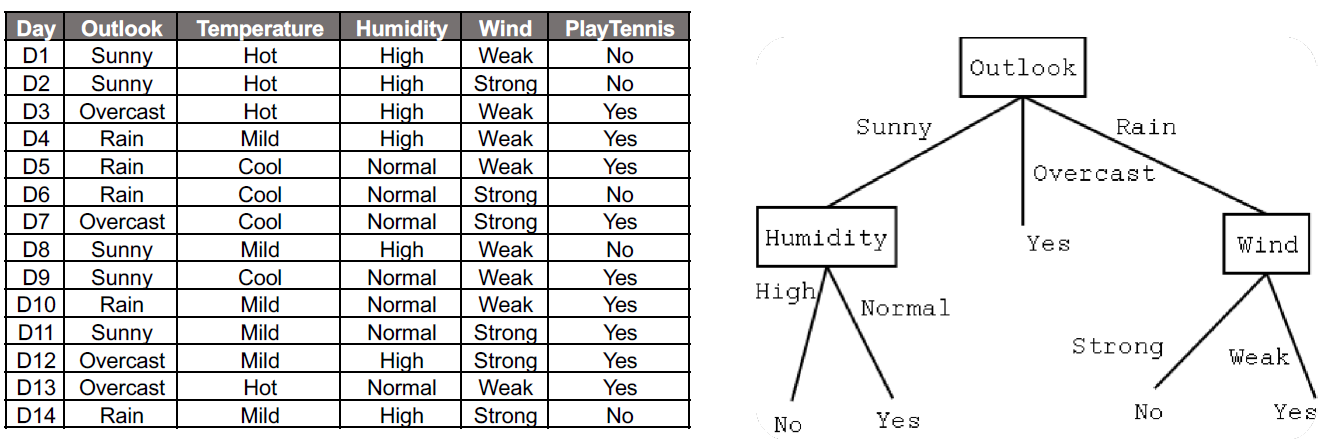

 * **변수들로 기준을 만들고** 이것을 통해 샘플을 분류하고, 분류된 집단의 성질을 통하여 추정하는 모형  
 => 제일 끝에 남은 Sample들을 알고, 이를 통해 Y를 추정하겠다.  
 * Node - 분류의 기준이 되는 **변수** 가 위치, 이것을 통해 Sample을 나눈다
 * Edge - 샘플을 분류하는 조건이 위치하는 곳  
 * Depth - 제일 위의 Node에서 특정 노드까지 도달하기 위해서 거쳐야 하는 Edge수  
 * 장점 - 해석력이 높고, 범용성이 높다  
 * 단점 - 샘플에 민감하고 overfitting이 잘 일어난다 => 이를 해결하기 위해서 Ensemble사용  
 * 반응변수에 따라  
     * 범주형 변수 - 분류 트리 (Classfication Tree)
     * 연속형 변수 - 회귀 트리 (Regression Tree)

## (2) 엔트로피

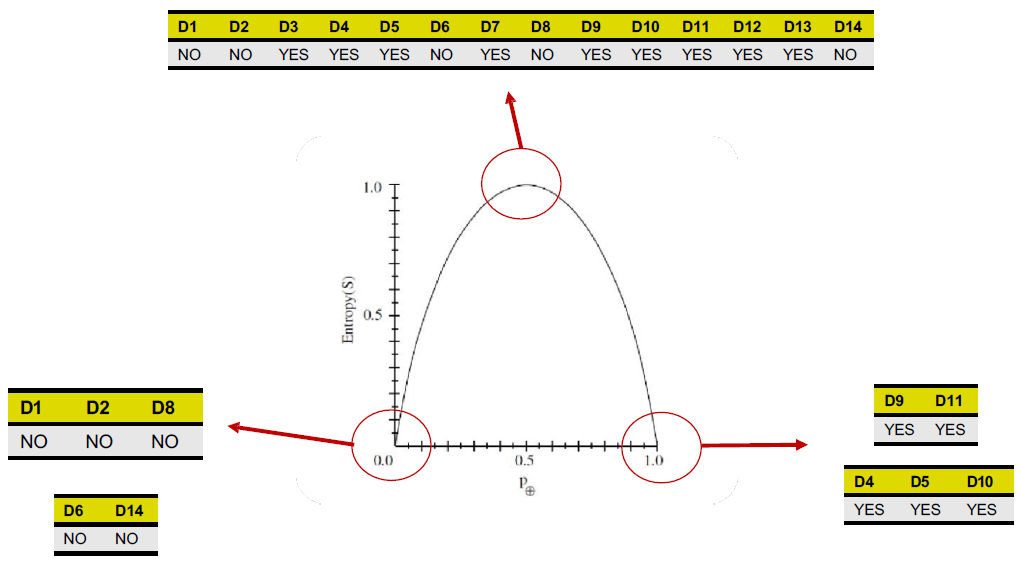

* **엔트로피 정의**  
    * -plogp-(1-p)log(1-p)
    * 위의 데이터처럼 섞여있는 정도로 생각하면 된다  
    -> 엔트로피가 높다 : 많이 섞여있다(Yes or No가 섞여있다) / 엔트로피가 낮다 : 균일하게 분리(p=0이면 No만, p=1이면 Yes만)
    * 반응변수 엔트로피가 낮아지게끔 분류를 하자
    * 데이터를 Split 함으로써 엔트로피가 낮아진다  
    * 엔트로피가 **높=>낮** 상황으로 만드는 것이 **Classification Tree의 개념**

## (3) Information Gain

* **Information Gain 정의**  
    - 분류기를 통해서 <u>어떤 특정 변수</u>를 통해 <u>어떤 범주</u>를 가지느냐 Sample을 나눠봤을 때  
    **변수가 유의미하다면** Entropy가 낮아짐 => 얼마나 낮아졌는지 차이를 나타낸 것이 **Information Gain**  
    - Information Gain = Entropy(before) - Entropy(after) => 전체 Entropy - 특정 변수 A를 썼을 때의 Entropy => IG가 큰 값을 쓴다!  
    - <u>두 변수 중</u> 누가 더 중요한가, 어떠한 변수를 더 **위에** 두어야 하는지 결정할때 **Information Gain** 사용

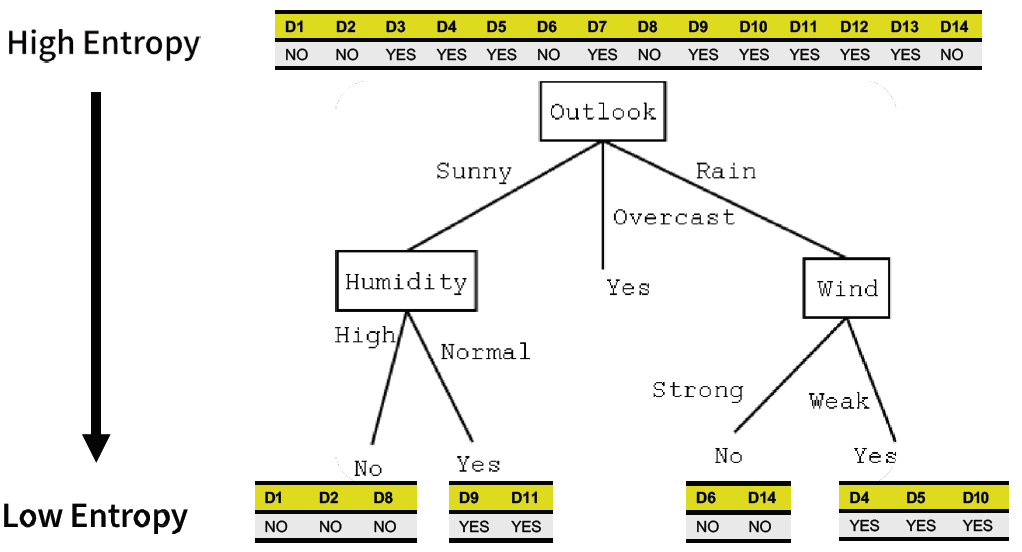

 * 제일 위에 Data는 분류가 안되고 복잡 -> High Entropy  
 * 제일 아래 Data는 분류가 잘 되어 있음 -> Low Entropy  
 * Information Gain이 가장 높은 변수를 첫번째 Node(Outlook)로 선택하고, 나눠진 관측치에 대해 다시 남은 변수를 활용하여  
   Information Gain을 구하고 둘중에 Information Gain가 높은 것을 다음 Node로 함

## (4) Classification Tree

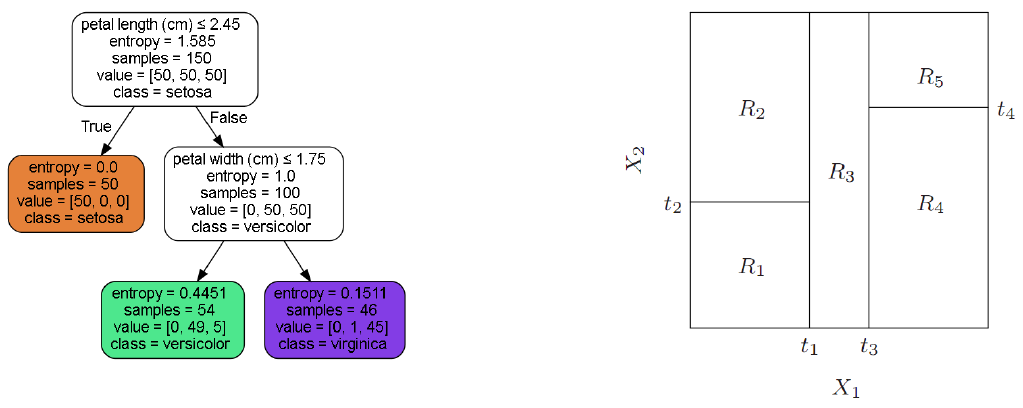

* Tree의 조건에 따라, X(범주형 일 때) 가 가질 수 있는 영역을 Block으로 나누는 개념  
    - 나누어진 영역안에 있는 Sample의 특성을 통해 Y 추정  
* m번째 Node가 K범주일 확률( P(mk) )  
* R(m)의 구성  
    - 독립변수에 대하여, <u>범주형</u> :각 범주에따라 / <u>연속형</u> : 여러개의 영역으로 임의로 나눔  
    - 나눈 영역에 따라 measure를 가장 좋은 값으로 만드는 **변수**와 **기준**을 선택
        => <u>엔트로피</u>, <u>오분류율</u>, <u>Gini Index</u>  
* 결정된 R(m)에 대하여 추정된 Y의 범주 : k(m) = argmaxP(mk)  
    => P(mk) 가 가장 커지는 "k"를 결정해 k(m) 선정 , m번째 Node의 Y범주를 의미!  

* <u>위의 Tree에서 제일 왼쪽 Node</u> 에서는 **k(m)**이 나타낸 class는 setosa라고 해석 가능하며, **P(m(setosa))**의 값이 다른 범주들 중에 가장 크게 나왔기 때문에 Node로 결정 된 것이다.

## (5) Decision Tree 실습

### (1) 모듈 및 데이터 불러오기

In [1]:
########################################  모듈 불러오기  ####################################
from sklearn.datasets import load_iris
from sklearn import tree
from os import system

system("pip install graphviz")
import graphviz

In [2]:
########################################  데이터 불러오기  ####################################
iris=load_iris()
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### (2) Decision Tree 구축 및 시각화

In [6]:
#### Decision Tree 구축 
clf=tree.DecisionTreeClassifier()
clf=clf.fit(iris.data,iris.target)

In [7]:
##  Tree 시각화 
dot_data=tree.export_graphviz(clf,out_file=None,
                             feature_names=iris.feature_names,
                            class_names=iris.target_names,
                              filled=True, rounded=True,
                              special_characters=True
                             )
graph=graphviz.Source(dot_data)

In [8]:
#### entropy를 사용한 Decision Tree 구축 
clf2=tree.DecisionTreeClassifier(criterion="entropy")
clf2=clf2.fit(iris.data,iris.target)

In [9]:
##  Tree 시각화 
dot_data2=tree.export_graphviz(clf,out_file=None,
                             feature_names=iris.feature_names,
                            class_names=iris.target_names,
                              filled=True, rounded=True,
                              special_characters=True
                             )
graph2=graphviz.Source(dot_data2)

In [10]:
#### 프루닝(depth를 지정) 하고 entropy를 사용한 Decision Tree 구축 
clf3=tree.DecisionTreeClassifier(criterion="entropy",max_depth=2)
clf3=clf3.fit(iris.data,iris.target)

In [11]:
##  Tree 시각화 
dot_data3=tree.export_graphviz(clf,out_file=None,
                             feature_names=iris.feature_names,
                            class_names=iris.target_names,
                              filled=True, rounded=True,
                              special_characters=True
                             )
graph3=graphviz.Source(dot_data3)

In [13]:
## Confusion Matrix 구하기
from sklearn.metrics import confusion_matrix
confusion_matrix(iris.target,clf.predict(iris.data))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]], dtype=int64)

In [14]:
confusion_matrix(iris.target,clf2.predict(iris.data))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]], dtype=int64)

In [15]:
confusion_matrix(iris.target,clf3.predict(iris.data))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]], dtype=int64)

### (3) Training - Test 구분 및 Confusion matrix 계산

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target, stratify=iris.target,random_state=1)

In [17]:
clf4=tree.DecisionTreeClassifier(criterion="entropy")
clf4.fit(X_train,y_train)
confusion_matrix(y_test,clf4.predict(X_test))

array([[12,  0,  0],
       [ 0, 13,  0],
       [ 0,  2, 11]], dtype=int64)